<h1>CURSO DE ESTATÍSTICA - PARTE 2</h1>
<hr>

In [4]:
import pandas, numpy, scipy, matplotlib

print('Pandas version => %s' % pandas.__version__)
print('Numpy version => %s' % numpy.__version__)
print('Scipy version => %s' % scipy.__version__)
print('Matplotlib version => %s' % matplotlib.__version__)

Pandas version => 1.4.2
Numpy version => 1.22.2
Scipy version => 1.8.0
Matplotlib version => 3.5.2


In [5]:
import pandas as pd
import numpy as np
from scipy.special import comb
from scipy.stats import binom, poisson, norm

In [6]:
df = pd.read_csv('../data/files/estatistica_dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<h2>2 DISTRIBUIÇÃO DE PROBABILIDADE</h2>
<hr>

<span style="color: red"><b>Problema</b></span>
<hr>
<p>
Em concurso para preencher uma vaga de cientista de dados temos um total de <b>10 questões</b> de multipla escolha
com <b>3 alternativas possíveis</b> em cada questão. <b>Cada questão tem o mesmo valor.</b> Suponha que um candidato resolva
se aventurar sem ter estudado nada. Ele resolve fazer a prova de olhos vendados e chtar todas as resposta. Assumindo que a prova
<b>Vale 10 pontos e a nota de corte seja 5</b>, obtenha a probabilidade desde candidato de <b>acertar 5 questões</b> e também a probabilidade desde candidado <b>passar para a próxima etapa do processo seletivo.</b>
</p>

<h5>Qual o número de ensaios (n)?</h5>

In [7]:
n = 10
n

10

<b>Os ensaios são indenpendentes?</b>
<p>Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão</p>
<br/>

<b>Somente dois resultados são possíveis em cada ensaio?</b>
<p>Sim. O candidato tem duas possibilidade - CERTA OU ERRADA para cada questão.</p>
<br/>

<b>Qual a probabilidade de sucesso (p)?</b>

In [8]:
number_alter_by_question = 3
p = 1 / number_alter_by_question
p

0.3333333333333333

<b>Qual a probabilidade de fracasso?</b>

In [9]:
q = 1 - p
q

0.6666666666666667

<b>Qual o total de eventos que deseja obter sucesso (k)?</b>

In [10]:
k = 5
k

5

<b>Solução 1</b>

In [11]:
proba = (comb(n, k) * (p ** k) * (q ** (n - k)))
print("%0.8f <= probabilidade de acertar 5 questões" % proba)

0.13656455 <= probabilidade de acertar 5 questões


<b>Solução 2</b>

In [12]:
proba = binom.pmf(k, n, p)
print("%0.8f <= probabilidade de acertar 5 questões" % proba)

0.13656455 <= probabilidade de acertar 5 questões


<h3>Probabilidade do candidato passar</h3>

![Probabilidade de passar no exame](../data/images/statistics-proba-pass.png)

In [13]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909492

In [14]:
binom.pmf([5,6,7,8,9,10], n, p).sum()

0.21312808006909492

In [15]:
1 - binom.cdf(4, n, p)

0.21312808006909523

In [16]:
binom.sf(4, n, p)

0.21312808006909525

<h3>2.1 Distribuição Binomial</h3>
<hr>
<p>
Um evento <b>binomial</b> é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias são representadas
por todo espaço de amostra, sendo também mutualmente excludentes, isto é, a ocorrência de uma
</p>

<br />
<div center>
<img alt="Probabilidade Binomial" height="220" src="../data/images/statistics-proba-binomial.png" width="500"/>
</div>


<p>Onde:</p>
<p><b>p</b> = probabilidade de sucesso</p>
<p><b>q</b> = (1 - p) = probabilidade de fracasso</p>
<p><b>n</b> = número de eventos estudados</p>
<p><b>k</b> = número de eventos desejados que tenham sucesso</p>

<h4>Experimento Binomial</h4>
<ol>
<li>Realização de <b>n</b> idênticos.</li>
<li>Os ensaios são independentes.</li>
<li>Somentes os dois resultados são possíveis, exemplo: Verdadeiro ou Falso; Cara ou Coroa; Sucesso ou Fracasso.
<li>A probablidade de sucesso é representada por <b>p</b> e a de fracasso por <b>(1 - p = q)</b>. Estas probabilidade não se modificam de
ensaio para ensaio</li>
</ol>

<h4>Média da distribuição binomial</h4>
<p>O valor esperado ou a média da distribuição binomial é igual ano número de experimentos realizados multiplicado pela change de
ocorrência do evento.</p>

<br />
<div center>
<img alt="Média da Distribuição Binomial" height="220" src="../data/images/statistics-media-dist-binomial.png" width="500"/>
</div>


<h4>Desvio padrão da distribuição binomial</h4>
<p>O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probablidade de fracasso</p>
<br/>
<div center>
<img alt="Desvio Padrão da Distribuição Binomial" height="220" src="../data/images/statistics-std-binomial.png" width="500"/>
</div>


<h4>Combinações:</h4>
<p>Número de combinações de <b>n</b> objetos, tomados <b>k</b> a cada vez, e:</p>
<br/>
<div center>
<img alt="Combinações" height="220" src="../data/images/statistics-comb.png" width="500"/>
</div>


<h4>Exemplo: Mega Sena</h4>
<p>Em um volante de loteria da Mega Sena temos um total de <b>60 números</b> para escolher. A aposta mínima é de seis números. Você
que é curioso resolve calcular a probabilidade de acertar na Mega Sena com apenas um jogo. Para isso precisamos saber quantas combinações
de seis números podem ser formadas com os 60 números disponíveis</p>
<br/>
<div center>
<img alt="Mega Sena" height="220" src="../data/images/statistics-comb-mega-sena.png" width="500"/>
</div>


In [17]:
combinations = comb(60, 6)
combinations

50063860.0

In [18]:
# Probabilidade de ganhar na Mega Sena com um jogo
proba = 1 / combinations
print('%0.15f <= Probabilidade de ganhar na Mega Sena com um Jogo' % proba)

0.000000019974489 <= Probabilidade de ganhar na Mega Sena com um Jogo


<p>
Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.</p>

In [19]:
print('{0:.2%} <= probabilidade de dar cora duas vezes'.format(binom.pmf(2, 4, (1/2))))

37.50% <= probabilidade de dar cora duas vezes


<p>
Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.</p>

In [20]:
print('{0:.2%} <= probabilidade do dado dar 5 voltado para cima pelo menos 3 vezes'.format(binom.sf(2, 10, (1/6))))

22.48% <= probabilidade do dado dar 5 voltado para cima pelo menos 3 vezes


<h3>Exemplo: Gincana</h3>
<hr>
<p>Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a <b>proporção de participantes do sexo feminino foi de 60%. O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30</b>. Com as informações acima responda: Quantas equipes deverão ser formadas por 8 mulheres?</p>

In [21]:
p = 0.6 # probabilidade de mulheres 60%
n = 12 # 12 integrantes
k = 8 # deve ser formada equipe de 8
proba = binom.pmf(k, n, p)
print('{0:.2%} <= probabilidade de equipe formada por 8 mulheres'.format(proba))

21.28% <= probabilidade de equipe formada por 8 mulheres


In [22]:
women_team = 30 * proba
print('{0:.2} <= exatamente equipes formada por mulheres'.format(women_team))
print('{} <= aproximadamente equipes formada por mulheres'.format(round(women_team)))

6.4 <= exatamente equipes formada por mulheres
6 <= aproximadamente equipes formada por mulheres


<b style="color: red">Problema</b>
<hr>
<p>Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?</p>

In [23]:
p = 0.22
n = 3
k = 2
proba = binom.pmf(k, n, p)
print('{0:.2%} <= probabilidade do casal ter filhos com olhos azuis'.format(proba))
print('{0:.3}'.format(50 * proba))

11.33% <= probabilidade do casal ter filhos com olhos azuis
5.66


<b style="color: red;">Problema</b>
<hr>
<p>Um restaurante recebe em média <b>20 pedidos por hora</b>. Qual a change de que, em determinada hora escolhida ao acesso, o restaurante receba <b>15 pedidos</b>?

<h3>2.2 Distribuição Poisson</h3>
<p>É empregada para descrever o número de ocorrência em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.<br/><br/>Como exemplos de processos onde podemos aplicar a distribuição de <b>Poisson</b> temos a determinação do número de clientes que entram em um loja em determinado hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc..</p>

<br/>
<div center>
<img alt="Distribuição Poisson" height="220" src="../data/images/statistics-distri-poisson.png" width="500"/>
</div>


<b>Onde:</b>
<b>e = onstante cujo valor é 2.718281828459045</b>
<b>u = representa o número médio de ocorrência em um determinado intervalo de tempo</b>
<b>k = número de sucesso no intervalo desejado</b>

<h4>Experimento Poisson</h4>
<ol>
<li>A probabilidade de uma ocorrência <b style="text-decoration: underline;">é a mesma em todo o intervalo observado</b></li>
<li>O número de ocorrência em determinado intervalo é <b style="text-decoration: underline;">independente</b> do número de ocorrência em observação</li>
<li>A probabilidade de uma ocorrência é a mesma em intervalos de <b style="text-decoration: underline;">igual comprimento</b></li>
</ol>

<h4>Desvio padrão da distribuição Poisson</h4>
<br />
<div center>
<img alt="Desvio Padrão da Distribuição Poisson" height="220" src="../data/images/statistics-std-poisson.png" width="500"/>
</div>


In [24]:
np.e

2.718281828459045

<b style="color: red">Problema</b>
<hr>
<h4>Exemplo: Delivery</h4>
<p>Um restaurante recebe em média <b>20 pedidos por hora</b>. Qual a change de que, em determinada hora escolhida ao acaso, o restaurante receba <b>15 pedidos</b>?

<b>Qual o número médio de ocorrência por hora (u)?</b>

In [25]:
media = 20
media

20

<b>Qual o número de ocorrências que queremos obter no período (k)?</b>

In [26]:
k = 15
k

15

<b>Solução 1</b>

In [27]:
proba = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print('%0.8f <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso' % proba)
print('{0:.2%} <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso'.format(proba))

0.05164885 <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso
5.16% <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso


<b>Solução 2</b>

In [28]:
proba = poisson.pmf(k, media)
print('%0.8f <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso' % proba)
print('{0:.2%} <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso'.format(proba))

0.05164885 <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso
5.16% <= probabilidade do restaurante receber 15 pedidos em uma hora por acaso


<b style="color: red;">Problema</b>
<hr>
<p>O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.</p>

In [29]:
print('{0:.2%} <= a probabilidade de na próxima hora entrerem 25 clientes'.format(poisson.pmf(25, 20)))

4.46% <= a probabilidade de na próxima hora entrerem 25 clientes


<h3>2.3 Distribuição Normal</h3>
<p>A distribuição normal é uma das mais utilizadas em estatísticas. É uma distribuição continua, onde a distribuição de frequência de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média</p>
<br />
<div center>
<img alt="Distribuição Normal" width="500" height="220" src="../data/images/statistics-distri-normal.png"/>
</div>


<h4>Características importantes</h4>
<ol>
<li>É simétrica em torno da média;</li>
<li>A área sob a curva corresponde à proporção 1 ou 100%;</li>
<li>As medidas de tendência central <b>(média, mediana e moda)</b> apresentam o mesmo valor;</li>
<li>Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo X;</li>
<li>O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;</li>
<li>A distribuição é definida por sua média e desvio padrão;</li>
<li>A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferiores</li>
</ol>

<br />
<div center>
<img alt="Distribuição Normal Fórmula" height="220" src="../data/images/statistics-distri-normal-form.png" width="500"/>
</div>


<b>Onde:</b>
<b>x = variável normal</b>
<b>&sigma; = desvio padrão</b>
<b>&mu; = média</b>

<p>A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferiores e superiores especificados, um exemplo pode ser visto abaixo:</p>

<br />
<div center>
<img alt="Distribuição Normal com Limites" height="220" src="../data/images/statistics-distri-normal-with-limit.png" width="500"/>
</div>

<p>Para obter a área acima basta calcular a integral da função para os intervalos determinados, conforme abaixo</p>

<br />
<div center>
<img alt="Distribuição Normal com Limites Fórmula" height="220" src="../data/images/statistics-distri-normal-with-limit-form.png" width="500"/>
</div>


<b>Onde:</b>
<b>x = variável normal</b>
<b>&sigma; = desvio padrão</b>
<b>&mu; = média</b>
<b>L<samp>i</samp> = limite inferior</b>
<b>L<samp>s</samp> = limite superior</b>

<h4>Tabelas padronizadas</h4>
<p>As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas. Para consultarmos os valores de uma tabela padronizada basta transformamos nossa variável normal Z. Esta variável Z representa o afastamento em desvios padrões de um valor da variável original em relação à média.</p>

<br />
<div center>
<img alt="Tabela Padronizada" height="220" src="../data/images/statistics-distri-normal-table-std.png" width="500"/>
</div>

<b>Onde:</b>
<b>x = variável normal com média &mu; e desvio padrão &sigma;</b>
<b>&sigma; = desvio padrão</b>
<b>&mu; = média</b>

<b>Tabela de padronização</b>

In [30]:
table_normal_std = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns=["{0:0.2f}".format(i / 100) for i in range(0, 10)]
)

for index in table_normal_std.index:
    for column in table_normal_std.columns:
        Z = np.round(float(index) + float(column), 2)
        table_normal_std.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

table_normal_std.rename_axis('Z', axis='columns', inplace=True)
table_normal_std

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<br />
<div center>
<img alt="Área Probabilidade" height="220" src="../data/images/statistics-distri-normal-area-proba.png" width="500"/>
</div>

<b style="color: red">Problema</b>
<hr>
<h4>Exemplo: Qual sua altura?</h4>
<p>Em um estudo sobre as alturas dos moradores de uma cidade verificou-seque o conjunto de dados segue uma <b>distribuição aproximadamente normal</b>, com <b>média 1,70</b> e <b>desvio padrão de 0,1</b>. Com estas informações obtenha o seguinte conjunto de probabilidades:</p>

<ul>
<li><b>A</b> probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.</li>
<li><b>B</b> probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.</li>
<li><b>C</b> probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.</li>
</ul>

<b>Problema A - Identificação da área sob a curva</b>
<br />
<div center>
<img width="500" height="220" src="../data/images/statistics-distri-normal-height.png" alt="Distribuição Normal Altura">
</div>

<b>Primeiro passo - obter a variável padronizada Z</b>

In [31]:
media = 1.7
media

1.7

In [32]:
std_deviation = 0.1
std_deviation

0.1

In [33]:
Z = (1.8 - media) / std_deviation
Z

1.0000000000000009

<b>Solução 1 - utilizando a tabela</b>

In [34]:
proba = 0.8413
print("{0:.3%} <= probabilidade de uma pessoa, selecionada ter menos de 1,80m".format(proba))

84.130% <= probabilidade de uma pessoa, selecionada ter menos de 1,80m


<b>Solução 2 - utilizando scipy</b>

In [35]:
from scipy.stats import norm
print("{0:.3%} <= probabilidade de uma pessoa, selecionada ter menos de 1,80m".format(norm.cdf(Z)))

84.134% <= probabilidade de uma pessoa, selecionada ter menos de 1,80m


<b style="color: red;">Problema</b>
<hr>
<p>
A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?
</p>

In [36]:
media = 70
std = 5
Z = (85 - media) / std
print("{0:.3%} <= probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85".format(norm.cdf(Z)))

99.865% <= probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85


<b>Problema B - Identificação da área sob a curva</b>
<br/>
<div center>
<img alt="Problema B" height="220" src="../data/images/statistics-distri-normal-area-media.png" width="500"/>
</div>

<b>Solução 1 usando a tabela</b>

In [37]:
Zi = round((1.6 - media) / std_deviation, 2)
Zu = round((1.8 - media) /std_deviation, 2)
print("{} var padrão inferior e {} var padrão superior".format(Zi, Zu))

-684.0 var padrão inferior e -682.0 var padrão superior


In [38]:
print("{0:.3%} <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m".format((0.8413 - 0.5) * 2))

68.260% <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m


<b>Solução 2 usando Scipy</b>

In [39]:
Zi = round((1.6 - media) / std_deviation, 2)
Zu = round((1.8 - media) / std_deviation, 2)
print("{} var padrão inferior e {} var padrão superior".format(Zi, Zu))

-684.0 var padrão inferior e -682.0 var padrão superior


In [40]:
proba = norm.cdf(Zu) - (1 - norm.cdf(Zu))
print("{0:.3%} <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m".format(proba))

-100.000% <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m


In [41]:
print("{0:.3%} <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m".format((norm.cdf(Zu) - norm.cdf(Zi))))

0.000% <= probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60m e 1,80m


<b style="color: red">Problema</b>
<hr>
<p>O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média 300,00 e desvio padrão igual a 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:</p>

<ol>
<li>Entre 250,00 e 350,00</li>
<li>Entre 400,00 e 500,00</li>
</ol>

In [42]:
media = 300
std = 50

<b>Caso 1</b>

In [43]:
Zi = (250 - media) / std
Zu = (350 - media) / std
print("{0:.2%} <= probabilidade do motorista ter ganho dentre 250 e 350".format(norm.cdf(Zu) - norm.cdf(Zi)))

68.27% <= probabilidade do motorista ter ganho dentre 250 e 350


<b>Caso 2</b>

In [44]:
Zi = (400 - media) / std
Zu = (500 - media) / std
print("{0:.2%} <= probabilidade do motorista ter ganho dentre 250 e 350".format(norm.cdf(Zu) - norm.cdf(Zi)))

2.27% <= probabilidade do motorista ter ganho dentre 250 e 350


<b>Problema C - idenficação da área sob a curva</b>

<br />
<div center>
<img alt="Problema C" width="500" height="220" src="../data/images/statistics-distri-normal-area-maior.png" />
</div>

In [45]:
print("{0:.2%} <= probabilidade de uma pessoa, selecionada ter maior que 1,90m".format(1 - 0.9772))

2.28% <= probabilidade de uma pessoa, selecionada ter maior que 1,90m


In [46]:
print("{0:.2%} <= probabilidade de uma pessoa, selecionada ter maior que 1,90m".format(1 - norm.cdf((1.9 - media) / std_deviation)))

100.00% <= probabilidade de uma pessoa, selecionada ter maior que 1,90m


In [47]:
print("{0:.2%} <= probabilidade de uma pessoa, selecionada ter maior que 1,90m".format(norm.cdf(-(1.9 - media) / std_deviation)))

100.00% <= probabilidade de uma pessoa, selecionada ter maior que 1,90m


<b style="color: red">Problema</b>
<hr>
<p>O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:</p>

<ol>
<li>Entre 650 e 750 dias</li>
<li>Mais que 800 dias</li>
<li>Menos que 700 dias</li>
</ol>

In [48]:
print("{0:.2%} <= probabilidade de uma lampada durar entre 650 e 750 dias".format((norm.cdf((750 - 720)/30) - norm.cdf((650 - 720) / 30) )))

83.15% <= probabilidade de uma lampada durar entre 650 e 750 dias


In [49]:
print("{0:.2%} <= probabilidade de uma lampada durar mais que 800 dias".format(norm.cdf(-(800 - 720) / 30)))

0.38% <= probabilidade de uma lampada durar mais que 800 dias


In [50]:
print("{0:.2%} <= probabilidade de uma lampada durar menos que 700 dias".format(norm.cdf((700 - 720) / 30)))

25.25% <= probabilidade de uma lampada durar menos que 700 dias


<h2>AMOSTRAGEM</h2>
<hr>

<h4>3.1 Popução e Amostra</h4>

<b>População</b>
<p>
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo
pessoas, idades, alturas, carros etc.
Com  relação ao tamanho, as populações podem ser limitadas (população finitas) ou ilimitadas (população infinitas)
</p>

<b>População Finitas</b>
<p>Permite a contagem de seus elementos. Como por exemplo temos o número de funcionários de uma empresa, a quantidade
de alunos em uma escola etc..</p>

<b>População Infinita</b>
<p>Quando não é possível contar seus elementos. Como por exemplo temos a quantidade de porções que se pode extrair da..
uma análise, temperatura de medida em cada ponto de um território etc..</p>

<h4>3.2 Quando utilizar uma amostra</h4>

<b>População infinitas</b>
<p>O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população</p>

<b>Testes destrutivos</b>
<p>Estudos onde os elementos avaliados são totalmente consumidos ou destruídos: teste de vida útil</p>

<b>Resultados rápidos</b>
<p>Pesquisas que precisam de mais agilidade na divulgação. Pesquisa de opinão</p>

<h4>3.3 Amostragem Aleatória Simples</h4>

<p>É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de 
abordagem é que cada elemento da população tenha as mesmas chances de ser selecionado para fazer parte da amostra</p>

In [51]:
df.shape[0]

76840

In [52]:
df.Renda.mean()

2000.3831988547631

In [53]:
amostra = df.sample(n=100, random_state=101)

In [54]:
amostra.shape[0]

100

In [55]:
amostra.Renda.mean()

2150.85

In [56]:
df.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [57]:
amostra.Sexo.value_counts(normalize=True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

<h4>Teorema do limite central</h4>
<p> O <b>teorema do limite central</b> afirma que, com o aumento do tamanho da amostra, a distribuição das médias 
amostrais se aproxima de uma distribuição normal com média igual a média da população e desvio igual ao desvio padrão
da variável original dividido pela raiz quadrada do tamanho da amostra. Este é assegurado para n maior ou igual a 30</p>

In [58]:
n = 2000
total_de_amostra = 1500

In [59]:
amostras = pd.DataFrame()
amostras

""


In [62]:
for i in range(total_de_amostra):
  _ = df.Idade.sample(n)
  _.index = range(0, len(_))
  amostras["Amostra_" + str(i)] = _

amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,29,69,52,27,38,61,22,62,48,37,...,32,44,39,51,50,59,21,55,46,60
1,51,39,52,60,49,34,60,62,35,45,...,63,36,58,60,27,35,50,35,58,28
2,54,58,65,33,48,39,25,36,25,48,...,52,34,35,67,41,45,67,72,40,25
3,48,34,33,75,49,27,29,26,58,40,...,45,28,43,32,35,51,22,26,54,38
4,46,45,28,50,30,59,35,32,32,44,...,37,36,53,51,35,34,41,35,41,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,48,68,53,50,48,66,41,31,49,31,...,40,34,35,88,42,52,54,42,49,50
1996,58,46,66,41,46,58,33,38,50,43,...,33,31,56,35,28,43,27,45,24,43
1997,28,52,30,27,63,57,48,31,47,35,...,47,56,58,64,41,45,32,50,47,50
1998,57,52,44,42,42,36,42,38,54,49,...,53,46,45,67,49,48,29,41,38,43


In [63]:
amostras.mean()

Amostra_0       44.3655
Amostra_1       44.4910
Amostra_2       44.3170
Amostra_3       44.2795
Amostra_4       43.6960
                 ...   
Amostra_1495    44.5740
Amostra_1496    43.8005
Amostra_1497    43.4360
Amostra_1498    43.8990
Amostra_1499    43.8095
Length: 1500, dtype: float64

<AxesSubplot:>

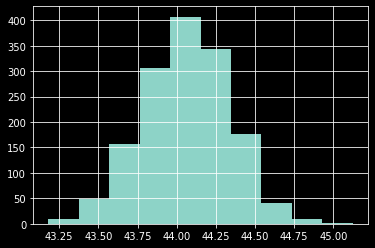

In [66]:
amostras.mean().hist()

In [67]:
df.Idade.mean()

44.07142113482561

In [68]:
amostras.mean().mean()

44.064951

In [69]:
amostras.mean().std()

0.27307384834527837

In [70]:
df.Idade.std() / np.sqrt(n)

0.27907433027404266

<h4>Nível de confiança e significância</h4>
<p>O <b>nível de confiança (1 - &alpha;)</b> representa a probabilidade de acerto da estimativa. De forma complementar o <b>
o nível de significância</b> (&alpha;) expressa a probabilidade de erro da estimativa.</p>
<p>O <b>nível de confiança</b> representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado
intervalo. Quando fixamos em uma pesquisa um <b>nível de confiança</b> de 95%, por exemplo, estamos assumindo que existe
uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.